In [7]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import pandas_datareader.data as pdr
import datetime
import sklearn
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [115]:
gld = pdr.get_data_yahoo('GLD')
day = np.arange(1, len(gld) + 1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]

In [28]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1261 entries, 2017-03-13 to 2022-03-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1261 non-null   int64  
 1   Open    1261 non-null   float64
 2   High    1261 non-null   float64
 3   Low     1261 non-null   float64
 4   Close   1261 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.1 KB


In [30]:
gld.describe()

,day,Open,High,Low,Close
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,631.000000,143.555789,144.120603,142.937304,143.555575
std,364.163654,23.472031,23.646723,23.229463,23.465713
min,1.000000,111.459999,111.879997,111.059998,111.099998
25%,316.000000,121.709999,122.070000,121.290001,121.650002
50%,631.000000,139.020004,139.449997,138.130005,139.000000
75%,946.000000,167.179993,167.729996,166.490005,167.089996
max,1261.000000,193.740005,194.449997,192.520004,193.889999


In [116]:
gld['9-day'] = gld['Close'].rolling(9).mean().shift()
gld['21-day'] = gld['Close'].rolling(21).mean().shift()

In [117]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)

In [118]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()

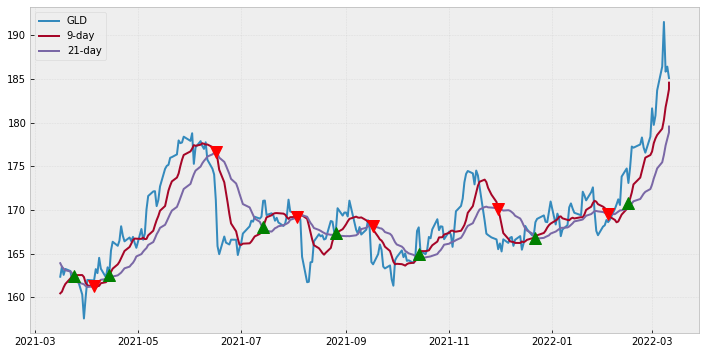

In [119]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')

gldx = gld[-252:]
gldl = gldx.loc[gldx.entry == 2]
glds = gldx.loc[gldx.entry == -2]
plt.plot(gldl.index, gldl['9-day'], '^', color = 'g', markersize = 12)
plt.plot(glds.index, glds['21-day'], 'v', color = 'r', markersize = 12)
plt.legend(loc=2)

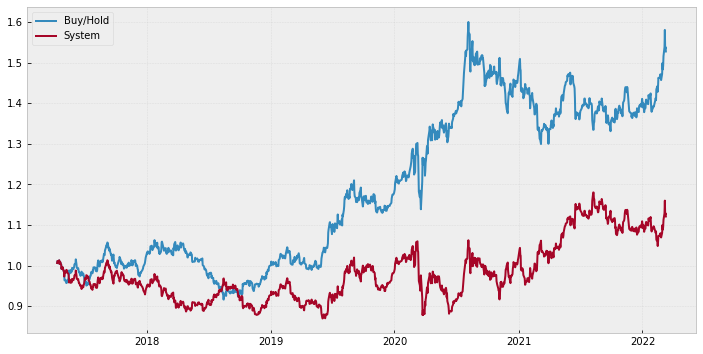

In [120]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [121]:
np.exp(gld['return']).cumprod()[-1] -1

0.527271166013703

In [122]:
np.exp(gld['system_return']).cumprod()[-1] -1

0.12132594151152976